In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset(note; parsing the column with date feature is as a result of what i wanted to achieve with the dataset,not objectively necessary)
df = pd.read_csv('C:/Users\stanl/OneDrive/Documents/ecommerce_data.csv', parse_dates=['PurchaseDate'], dayfirst=True)
df.head()                 

,CustomerID,Age,Gender,PurchaseDate,Category,Product,Quantity,Price,TotalSpend
0,1001,32,Female,2024-01-12,Electronics,Smartphone,1,699.99,699.99
1,1002,45,Male,2024-01-13,Home,Vacuum Cleaner,1,150.00,150.00
2,1003,28,Female,2024-01-14,Clothing,Jacket,2,89.99,179.98
3,1004,36,Male,2024-01-14,Groceries,Organic Produce,5,3.99,19.95
4,1005,29,Female,2024-01-15,Books,Fiction Novel,1,14.99,14.99


In [3]:
# check if there are any null values
null = df.isnull().any()
null

CustomerID      False
Age             False
Gender          False
PurchaseDate    False
Category        False
Product         False
Quantity        False
Price           False
TotalSpend      False
dtype: bool

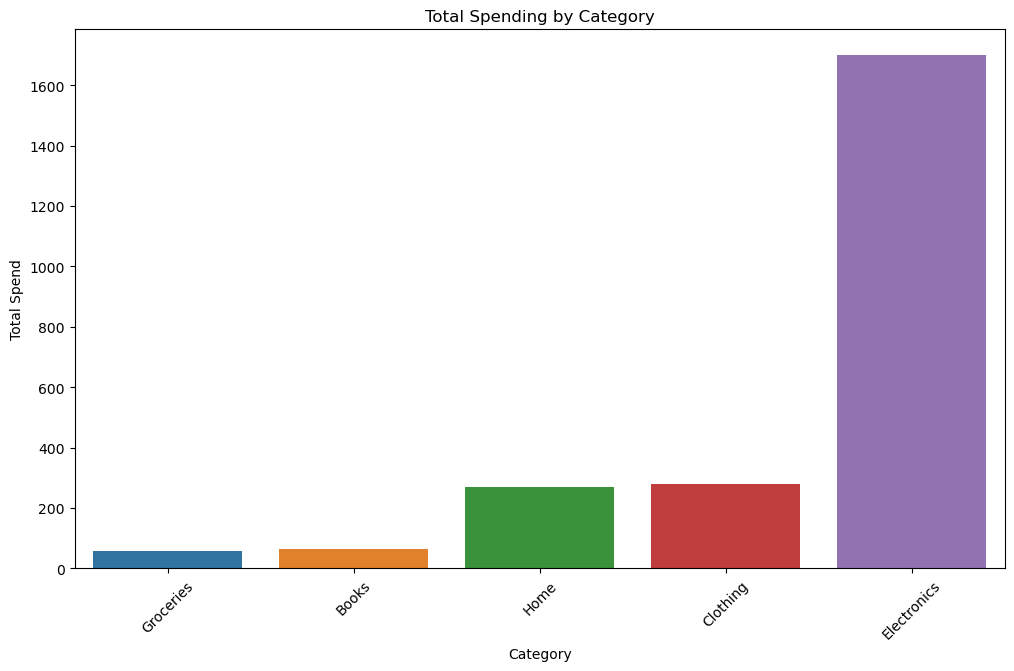

In [4]:
#using the dataset to see a visualization of the total amount spent by category, groupby was employed to show different colors for different categories
category_by_spending = df.groupby('Category')['TotalSpend'].sum().sort_values()
plt.figure(figsize=(12,7))
sns.barplot(x=category_by_spending.index, y=category_by_spending.values)
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.title('Total Spending by Category')
plt.xticks(rotation=45)
plt.show()

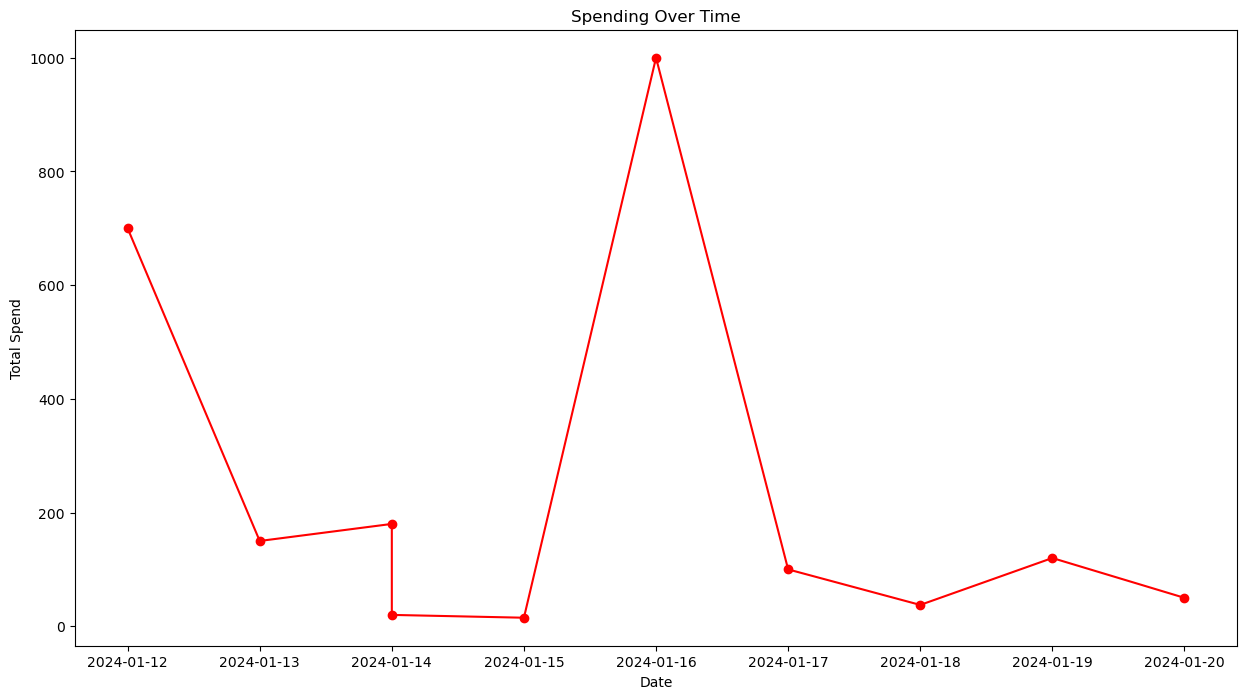

In [5]:
# another way to bring more data was to check spending over time
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df['PurchaseDate'], df['TotalSpend'], color='r', marker='o')
ax.set_title('Spending Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Total Spend')
plt.show()

In [6]:
#this code appears here, because i initially used a different syntax in the cell above which converted PurchaseDate column to datetime.
#i had an error with that syntax, so i had to resort to using ax function to be able to visualize it. I also did this to check the dtype of the column.
print(df['PurchaseDate'].dtype)

datetime64[ns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    10 non-null     int64         
 1   Age           10 non-null     int64         
 2   Gender        10 non-null     object        
 3   PurchaseDate  10 non-null     datetime64[ns]
 4   Category      10 non-null     object        
 5   Product       10 non-null     object        
 6   Quantity      10 non-null     int64         
 7   Price         10 non-null     float64       
 8   TotalSpend    10 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 852.0+ bytes


In [8]:
#just giving the small dataset a general overlook
df

,CustomerID,Age,Gender,PurchaseDate,Category,Product,Quantity,Price,TotalSpend
0,1001,32,Female,2024-01-12,Electronics,Smartphone,1,699.99,699.99
1,1002,45,Male,2024-01-13,Home,Vacuum Cleaner,1,150.00,150.00
2,1003,28,Female,2024-01-14,Clothing,Jacket,2,89.99,179.98
3,1004,36,Male,2024-01-14,Groceries,Organic Produce,5,3.99,19.95
4,1005,29,Female,2024-01-15,Books,Fiction Novel,1,14.99,14.99
5,1006,41,Female,2024-01-16,Electronics,Laptop,1,999.99,999.99
6,1007,34,Male,2024-01-17,Clothing,Shoes,2,49.99,99.98
7,1008,26,Male,2024-01-18,Groceries,Coffee Beans,3,12.50,37.50
8,1009,33,Female,2024-01-19,Home,Cookware Set,1,120.00,120.00
9,1010,50,Male,2024-01-20,Books,Non-Fiction Novel,2,24.99,49.98


C:\Users\stanl\AppData\Local\Temp\ipykernel_12716\2039657880.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df.groupby('AgeGroup')['TotalSpend'].mean()


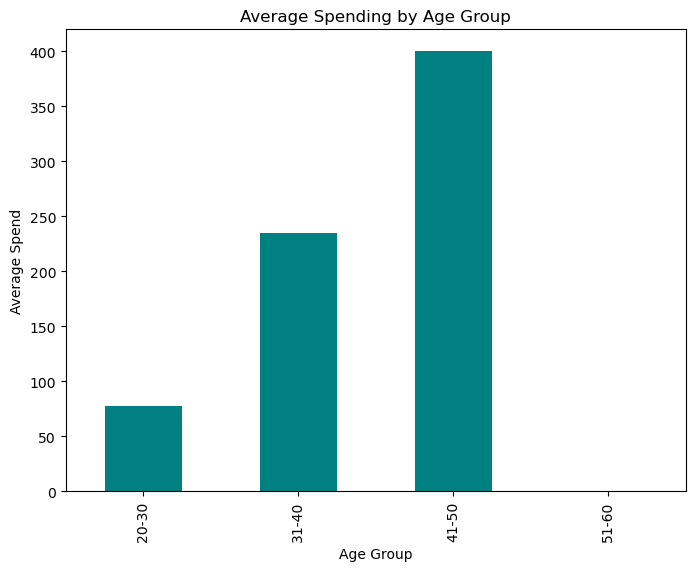

In [9]:
# then i looked at the averge spending by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '31-40', '41-50', '51-60'])
age_spend = df.groupby('AgeGroup')['TotalSpend'].mean()
age_spend.plot(kind='bar', color='teal', figsize=(8, 6))
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.title('Average Spending by Age Group')
plt.show()

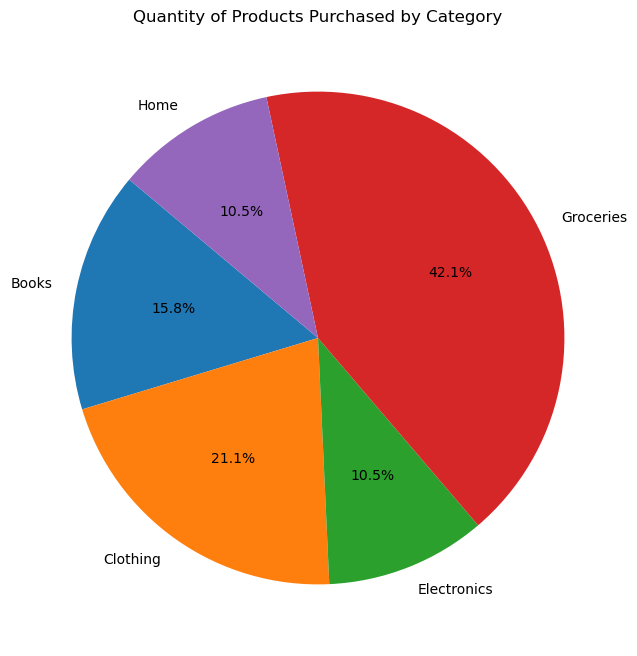

In [10]:
# oh look, a pie chart showing quantity of products purcahsed by category
category_quantity = df.groupby('Category')['Quantity'].sum()
category_quantity.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.ylabel('')
plt.title('Quantity of Products Purchased by Category')
plt.show()

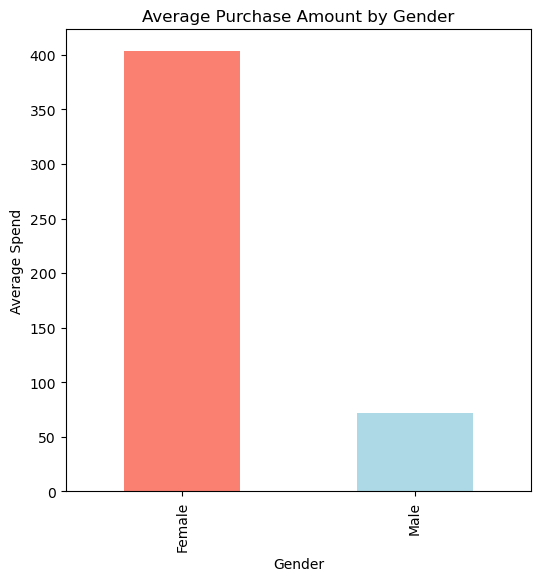

In [11]:
# who spends more? ladies or gents, look down
gender_spend = df.groupby('Gender')['TotalSpend'].mean()
gender_spend.plot(kind='bar', color=['salmon', 'lightblue'], figsize=(6, 6))
plt.xlabel('Gender')
plt.ylabel('Average Spend')
plt.title('Average Purchase Amount by Gender')
plt.show()